### Question 1:
Using the stats.py module implemented in the first exercise, calculate and display:
- the mean of the weight and height of the population;
- the median of the weight and height of the population;
- the variance of the weight and height of the population.

In [1]:
from stats import mean, median, variance
import numpy as np
from matplotlib import pyplot as plt

population = np.genfromtxt(
    open(
        "/Users/binhtran/projects/usth-programming-techniques/labwork1/population.csv",
        "rb",
    ),
    delimiter=",",
    names=True,
    dtype=None,
)

In [2]:
mean_weight = mean(population["weight"])
mean_height = mean(population["height"])

median_weight = median(population["weight"])
median_height = median(population["height"])

variance_weight = variance(population["weight"])
variance_height = variance(population["height"])
print("Mean weight:", mean_weight)
print("Mean height:", mean_height)
print("Median weight:", median_weight)
print("Median height:", median_height)
print("Variance weight:", variance_weight)
print("Variance height:", variance_height)

Mean weight: 64.9090909090909
Mean height: 174.03030303030303
Median weight: 66.0
Median height: 174.5
Variance weight: 139.44628099173553
Variance height: 86.27180899908291


### Question 2:
Using the Pyplot sub-module, write a program to draw a graph showing the scatterplot (points, size) as in the following figure

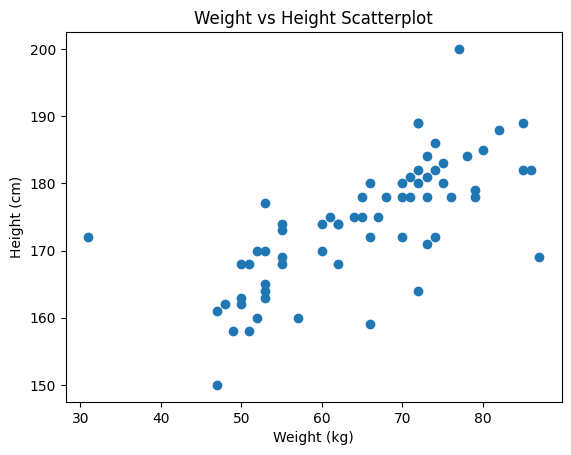

In [3]:
plt.scatter(population["weight"], population["height"])
plt.title("Weight vs Height Scatterplot")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.show()

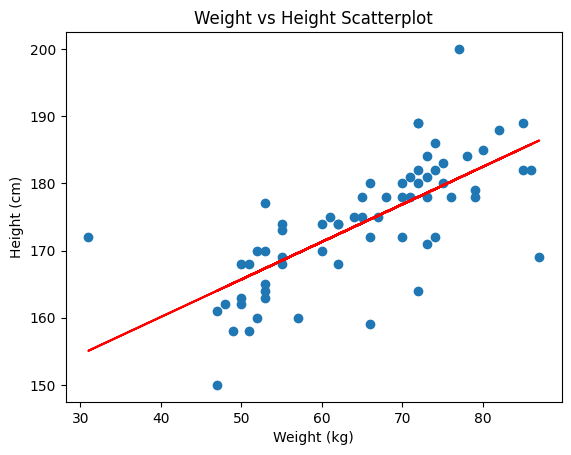

In [4]:
# Add a regression line
plt.scatter(population["weight"], population["height"])
plt.title("Weight vs Height Scatterplot")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

m, b = np.polyfit(
    population["weight"],
    population["height"],
    1,
)
plt.plot(population["weight"], m * population["weight"] + b, color="red")
plt.show()


### Question 3:
Write a program to plot the scatterplot (weight; height) for women with its weight/height regression line.

[('f', 87, 169) ('f', 31, 172) ('f', 55, 174) ('f', 50, 168)
 ('f', 66, 159) ('f', 48, 162) ('f', 52, 160) ('f', 53, 165)
 ('f', 51, 158) ('f', 53, 164) ('f', 49, 158) ('f', 50, 163)
 ('f', 53, 170) ('f', 70, 172) ('f', 62, 174) ('f', 51, 168)
 ('f', 52, 170) ('f', 57, 160) ('f', 53, 163) ('f', 55, 168)
 ('f', 66, 172) ('f', 50, 162) ('f', 53, 177) ('f', 47, 161)
 ('f', 47, 150)]


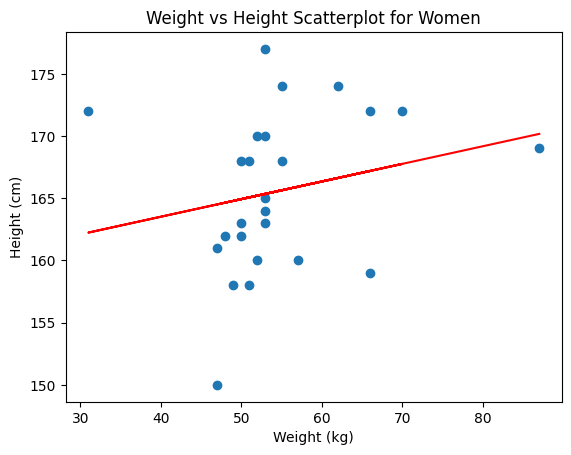

In [5]:
# Only for Women
women = population[population["sex"] == 'f']
print(women)
plt.scatter(women["weight"], women["height"])
plt.title("Weight vs Height Scatterplot for Women")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

m, b = np.polyfit(
    women["weight"],
    women["height"],
    1,
)
plt.plot(women["weight"], m * women["weight"] + b, color="red")
plt.show()


### Question 4: 
Write a program to plot :
- a graph on the left showing the distribution for women as a scatter plot (weight; height) and with the regression line;
- a graph on the right showing the same for men.

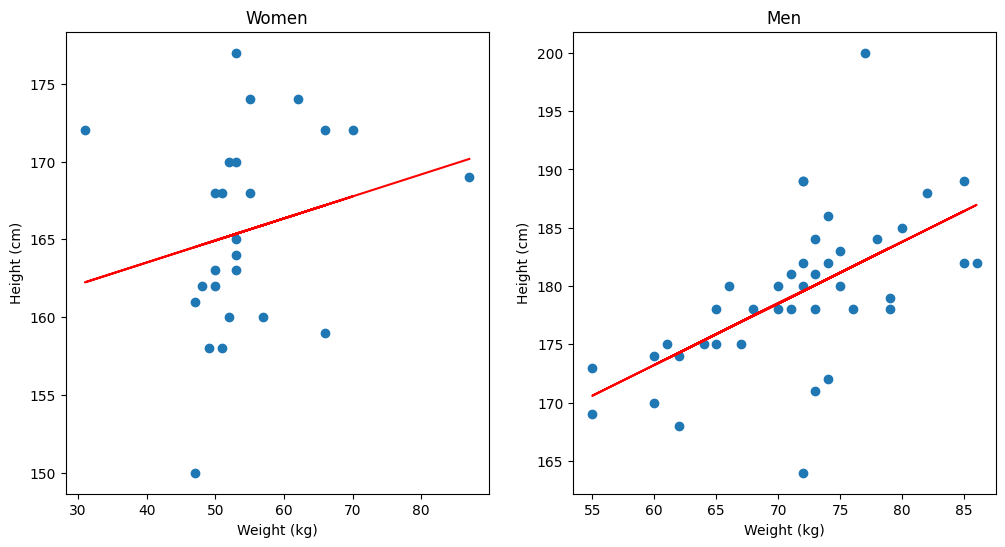

In [6]:
men = population[population["sex"] == 'h']
women = population[population["sex"] == 'f']

# Plot the 2 scatterplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(women["weight"], women["height"])
ax1.set_title("Women")
ax1.set_xlabel("Weight (kg)")
ax1.set_ylabel("Height (cm)")
m_w, b_w = np.polyfit(women["weight"], women["height"], 1)
ax1.plot(women["weight"], m_w * women["weight"] + b_w, color="red")

ax2.scatter(men["weight"], men["height"])
ax2.set_title("Men")
ax2.set_xlabel("Weight (kg)")
ax2.set_ylabel("Height (cm)")
m_m, b_m = np.polyfit(men["weight"], men["height"], 1)
ax2.plot(men["weight"], m_m * men["weight"] + b_m, color="red") 

plt.show()

### Question 5: 
The body mass index (BMI) is defined as $\frac{p}{t^2}$ with:

• $p$ the weight in **kg**; $p$ le poids **en kg**;

• $t$ the height in **meter**.

Write a program to plot a histogram showing the number of people per gender with the correct BMI (i.e., between 18.5 and 25), as in the following figure:

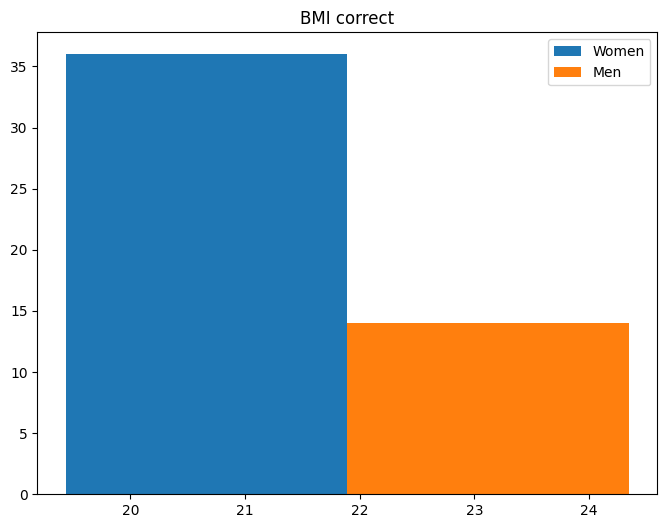

In [7]:
plt.figure(figsize=(8, 6))
bmi_women = women["weight"] / ((women["height"] / 100) ** 2)
bmi_men = men["weight"] / ((men["height"] / 100) ** 2)

bmi_women_correct = bmi_women[(bmi_women >= 18.5) & (bmi_women <= 25)]
bmi_men_correct = bmi_men[(bmi_men >= 18.5) & (bmi_men <= 25)]
plt.hist(
    [
        bmi_men_correct,
        bmi_women_correct,
    ],
    label=["Women", "Men"],
    bins=1,
)
plt.title("BMI correct")
plt.legend()
plt.show()

### Question 6: 
Write a program to plot:
- a histogram on the left showing the number of people by sex who are underweight (i.e., with a cpi less than 18.5) ;
- a histogram on the right showing the number of people per sex who are overweight (i.e. with an imc greater than 25).

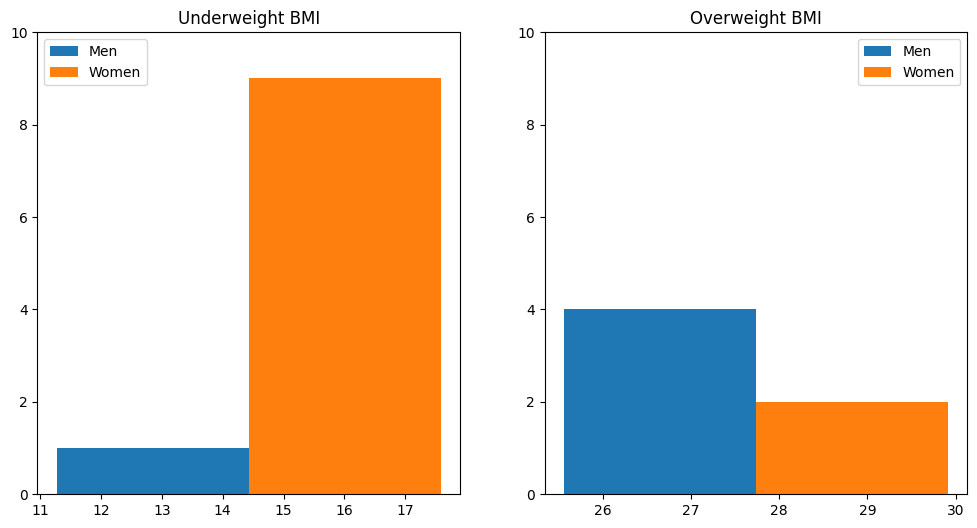

In [8]:
bmi_women_underweight = bmi_women[bmi_women < 18.5]
bmi_men_underweight = bmi_men[bmi_men < 18.5]

bmi_women_overweight = bmi_women[bmi_women > 25]
bmi_men_overweight = bmi_men[bmi_men > 25]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(
    [
        bmi_men_underweight,
        bmi_women_underweight,
    ],
    label=["Men", "Women"],
    bins=1,
)
ax1.set_ylim(0, 10)
ax1.set_title("Underweight BMI")
ax1.legend()

ax2.hist(
    [
        bmi_men_overweight,
        bmi_women_overweight,
    ],
    label=["Men", "Women"],
    bins=1,
)
ax2.set_ylim(0, 10)
ax2.set_title("Overweight BMI")
ax2.legend()

plt.show()

### Question 7: Density plot showing the point cloud of weight and height


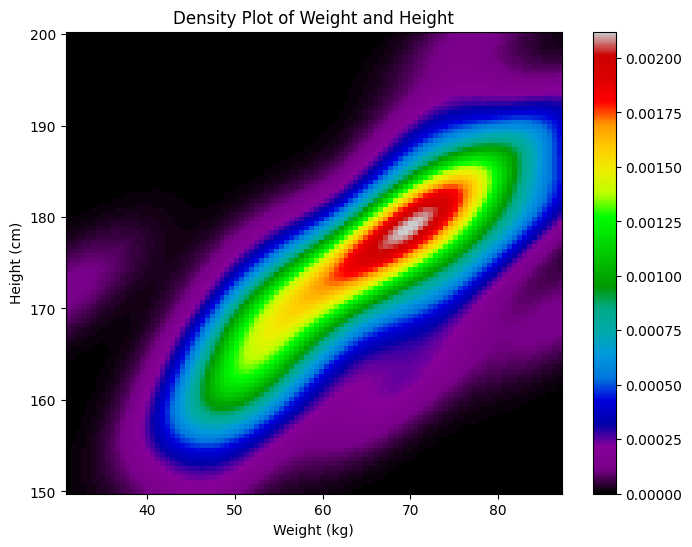

In [9]:
from scipy.stats import gaussian_kde

weight = population["weight"]
height = population["height"]

k = gaussian_kde([weight, height])
weight_i, height_i = np.mgrid[
    weight.min() : weight.max() : 100j,
    height.min() : height.max() : 100j,
]

zi = k(np.vstack([weight_i.flatten(), height_i.flatten()])).reshape(weight_i.shape)

fig, ax = plt.subplots(figsize=(8, 6))
plt.pcolormesh(weight_i, height_i, zi, shading='auto', cmap=plt.cm.nipy_spectral)
plt.colorbar()
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_title("Density Plot of Weight and Height")
plt.show()